In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [82]:
data=pd.read_csv("WELFake_Dataset.csv")

In [83]:
data.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [84]:
data.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
72129,False,False,False,False
72130,False,False,False,False
72131,False,False,False,False
72132,False,False,False,False


In [85]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [86]:
data=data.dropna()

In [87]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer(max_features = 10000)
x = vectorizer.fit_transform(data["text"])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, data["label"], test_size = 0.2, random_state = 42)

In [92]:
X_train.shape

(57229, 10000)

In [93]:
X_test.shape

(14308, 10000)

In [94]:
y_train.shape


(57229,)

In [95]:
y_test.shape


(14308,)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [97]:
model_w={
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state = 42),
    "DecisionTree" : DecisionTreeClassifier(criterion = "entropy", random_state = 42)
}

LogisticRegression accuracy is: 0.9450656975118815


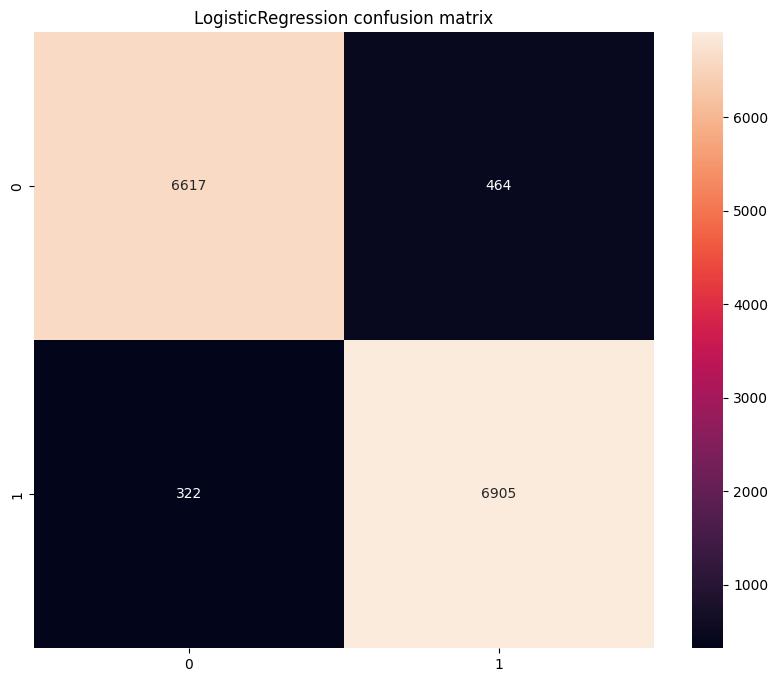

RandomForest accuracy is: 0.9404528934861616


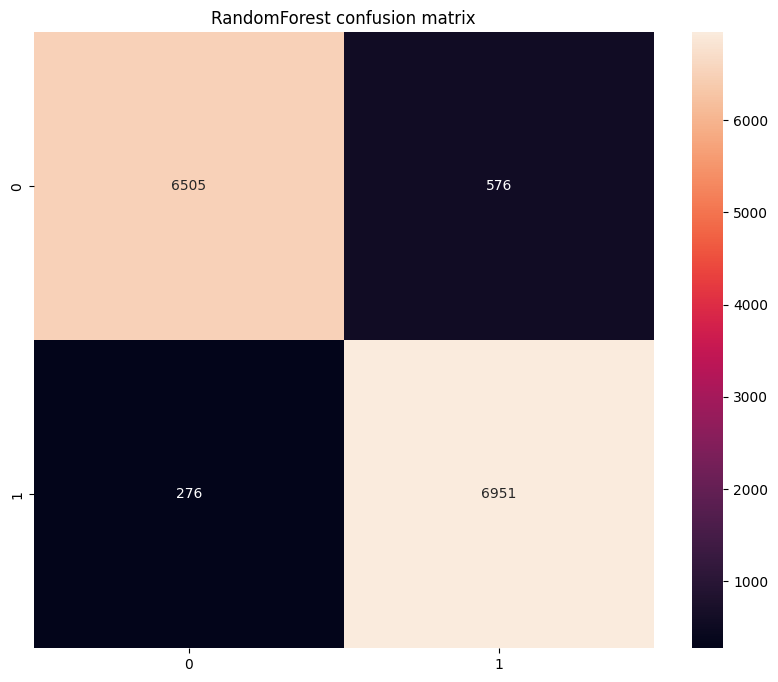

DecisionTree accuracy is: 0.9218618954431087


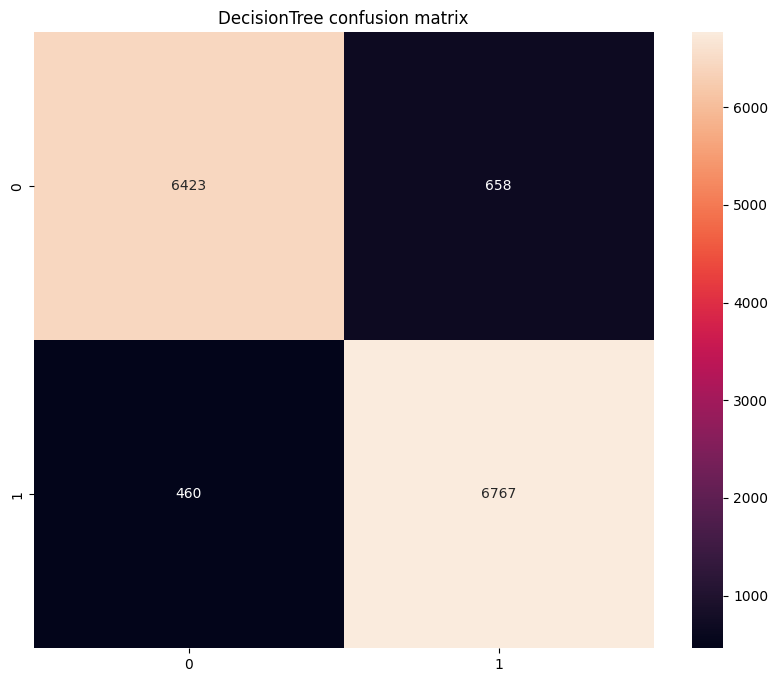

In [98]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state = 42),
    "DecisionTree" : DecisionTreeClassifier(criterion = "entropy", random_state = 42)
}

for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    
    predictions = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, predictions)

    
    conf_metrix = confusion_matrix(y_test, predictions)

    print(f"{model_name} accuracy is: {accuracy}")

    
    plt.figure(figsize = (10,8))
    sns.heatmap(conf_metrix, annot = True, fmt = "d", color = "blue")
    plt.title(f"{model_name} confusion matrix")
    plt.show()
    

    
    

In [136]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [137]:
print("Training Accuracy is: ", lg_model.score(X_train, y_train))
print("Testing Accuracy is: ", lg_model.score(X_test, y_test))


Training Accuracy is:  0.955721749462685
Testing Accuracy is:  0.9450656975118815


In [138]:
predictions = lg_model.predict(X_test)

In [139]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7081
           1       0.94      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.94      0.95     14308
weighted avg       0.95      0.95      0.95     14308



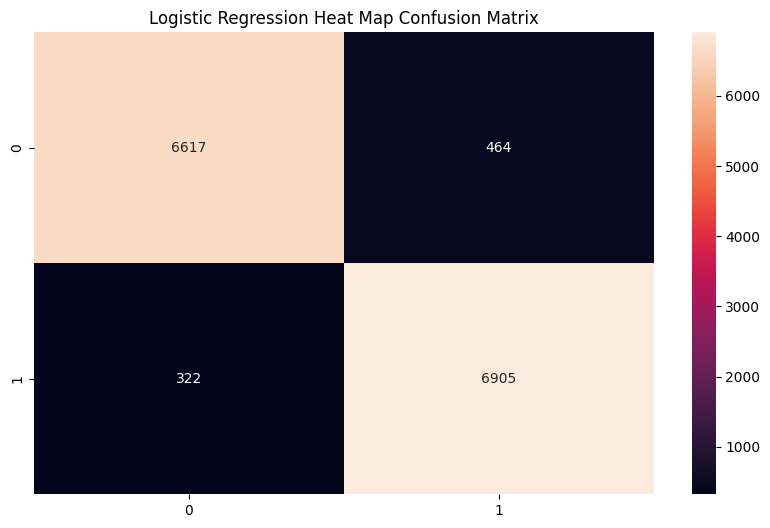

In [145]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", color = "blue")
plt.title("Logistic Regression Heat Map Confusion Matrix")
plt.show()

In [149]:
def news_predicter(news):
    new_vectorizer=vectorizer.transform([news])
    predic=lg_model.predict(new_vectorizer)


    if predic[0]==0:
        print("Fake")

    else:
        print("Real")


    return predic[0]

In [150]:
input = "On Tuesday, White House Propaganda Minister Sean Spicer once again baffled reporters and other thinking individuals by once again saying the dumbest thing imaginable.Asked why the White House refuses to provide documents related to former National Security Advisor and registered foreign agent Michael Flynn s hiring, Spicer took the tried-and-true route of blaming President Obama.Spicer explained that the Trump White House isn t responsible for anything related to Flynn s hiring because the documents were filled out   during the Obama administration  and  those are not documents that the White House would ever possess. Everything that the White House has been asked to do, the only documents that were made available to [Congress] that they asked for were the ones that the Department of Defense had,  Spicer said, explaining that he doesn t feel that the White House has an obligation to provide the information Congress has requested. How about these calls made where [Flynn] was working during the transition on behalf of a future President Trump?  CBS s Major Garrett asked.  Aren t those things that you should have some responsibility or obligation to provide if you can? It s a question [of] if you can,  Spicer said.  To ask for every call a national security adviser made is pretty outlandish. Those calls were made on behalf of the Trump transition were they not?  Garrett asked. Spicer, of course, told him that Trump isn t responsible for anything that happened before January 20 even if it was done by a member of the Trump transition team. When?  Spicer asked.  We started this administration on Jan. 20. All the information that they re talking about occurred prior to him being at the White House. Working for the transition!  Garrett pressed. Not at the White House!  Spicer snapped.  Everything that is being questioned occurred prior to Jan. 20th. Trump and his White House are absolutely responsible for Flynn   which is not good, as even Hillary Clinton witch hunter, Congressman Jason Chaffetz, admits that Flynn likely committed crimes.Watch this all happen below:Featured image via screengrab"


output = news_predicter(input)

Real


In [148]:
import joblib
joblib.dump(lg_model, "news_model.joblib")
joblib.dump(vectorizer, "vectorizer.joblib")


['vectorizer.joblib']